# Podstawy programowania (AD) 2

## Tomasz Rodak

Wykład X

---

## Metody specjalne

W Pythonie metodami *specjalnymi* (albo *magicznymi*) nazywamy te metody, których nazwy rozpoczynają i kończą dwa podkreślniki np.: `__init__()`, `__str__()`, `__eq__()` i wiele innych. Spisy metod specjalnych znajdziesz [tutaj](http://diveintopython3.problemsolving.io/special-method-names.html) i [tutaj](https://docs.python.org/3/reference/datamodel.html#). Wyjątkowość metod specjalnych polega na tym, że:
1. są wywoływane niejawnie przez odpowiednią składnię;
2. konwencja narzuca, za co każda z tych metod jest odpowiedzialna.

Poznaliśmy już metodę `__init__()` - jeśli klasa tę metodę posiada, to jest ona automatycznie wykonywana podczas tworzenia obiektów klasy. Jej cel to *inicjalizacja* obiektu, czyli ustawienie w obiekcie atrybutów i ich startowych wartości.

Podamy teraz kilka przykładów klas z różnymi metodami specjalnymi. 

## Funkcja liniowa

Klasa `FunkcjaLiniowa` reprezentuje znaną ze szkoły funkcję liniową
$$
y=ax+b
$$

In [1]:
class FunkcjaLiniowa:
    
    def __init__(self, a, b):
        self.a, self.b = a, b
    
    def __str__(self):
        if self.b >= 0:
            return 'y = {}*x + {}'.format(self.a, self.b)
        return 'y = {}*x - {}'.format(self.a, -self.b)
    
    def __repr__(self):
        return 'FunkcjaLiniowa({}, {})'.format(self.a, self.b)
    
    def __call__(self, x):
        return self.a*x + self.b

Oto funkcja $y=2x-3$:

In [2]:
f = FunkcjaLiniowa(2, -3)

Notatnik odwołuje się do metody `__repr__()`, aby przedstawić obiekt:

In [3]:
f

FunkcjaLiniowa(2, -3)

Funkcja `print()` poszukuje metody `__str__()`:

In [4]:
print(f)

y = 2*x - 3


Operator wywołania `()` odwołuje się do metody `__call__()`:

In [5]:
f(5)

7

Metody `__repr__()` i `__str__()` powinny zwracać łańcuch i nie powinny mieć parametrów innych niż `self`. W obu przypadkach zwracany łańcuch stanowi opis obiektu. Metoda `__str__()` powinna przedstawiać obiekt w sposób nieformalny i wygodny dla człowieka. Z kolei metoda `__repr__()` prezentuje oficjalną i formalną reprezentację obiektu. Wartość zwracana przez `__repr__()` powinna być, o ile to możliwe, poprawnym wyrażeniem Pythona.

Spójrz jak prezentowany jest obiekt daty i czasu w module `datatime`:

In [6]:
import datetime

dzisiaj = datetime.datetime.today()

Formalne przedstawienie metodą `__repr__()`:

In [7]:
dzisiaj

datetime.datetime(2025, 5, 14, 8, 39, 7, 810834)

Format przyjazny człowiekowi zwracany przez `__str__()`:

In [8]:
print(dzisiaj)

2025-05-14 08:39:07.810834


Różnica między tymi metodami została wyczerpująco opisana w [tym](https://stackoverflow.com/questions/1436703/difference-between-str-and-repr) wpisie na StackOverflow.

Metoda `__call__()` jest poszukiwana przez operator wywołania `()`. Argumenty operatora wywołania zostają przekazane do metody `__call__()` (która jako pierwszy argument musi mieć `self`). Jeśli obiekt posiada tę metodę, to staje się obiektem *wywoływalnym*. Fakt ten potrafi wykryć funkcja `callable()`:

In [9]:
callable(f)

True

Poznaliśmy więc już niemal wszystkie kategorie obiektów wywoływalnych Pythona:
* funkcje wbudowane, np. `len()`;
* funkcje zdefiniowane przez użytkownika z pomocą `def` lub `lambda`;
* metody wbudowane, np. metoda łancuchów `upper()`;
* klasy;
* metody klasy zdefiniowane przez użytkownika;
* obiekty posiadające metodę `__call__()`.

## Przykład: różniczkowanie numeryczne

Pochodną funkcji $f\colon (a, b)\to\mathbb{R}$ w punkcie $x_0\in (a, b)$ nazywamy granicę ilorazu różnicowego

$$
f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h) - f(x_0)}{h}.
$$

Jeżeli granica ta istnieje, to mówimy, że $f$ jest różniczkowalna w $x_0$.

Nasze podejście do różniczkowania numerycznego będzie polegało na tym, że zamiast liczyć powyższą granicę, obliczymy sam iloraz różnicowy dla $h$ konkretnego i bardzo bliskiego zera.

### Pochodna numeryczna

Klasa `Pochodna` przyjmuje parametry:
* `f` -- obiekt wywoływalny zwracający liczby. Z punktu widzenia użytkownika jest to funkcja rzeczywista.
* `h` -- "dostatecznie bliska zeru" wartość liczbowa. Może być ujemna lub dodatnia. Domyślnie `1e-7` czyli $10^{-7}$.

Na podstawie tych parametrów klasa tworzy obiekt wywoływalny przybliżający pochodną `f`.

In [10]:
class Pochodna:
    
    def __init__(self, f, h=1e-7):
        self.f = f
        self.h = h
    
    def __call__(self, x):
        f, h = self.f, self.h
        return (f(x + h) - f(x)) / h

Różniczkujemy instancję klasy `FunkcjaLiniowa`.

In [11]:
f = FunkcjaLiniowa(2, 3)
print(f)

y = 2*x + 3


In [12]:
df = Pochodna(f)

df(0)

2.0000000011677344

In [13]:
df = Pochodna(f, h=-1e-10)

df(0)

2.000000165480742

Rożniczkujemy funkcję kwadratową ...

In [14]:
def kwadratowa(x):
    return x * x

dkwadratowa = Pochodna(kwadratowa)

print('{:>3}|{:>7}|{:>18}'.format('x', '2*x', 'obliczona pochodna'))
print('{:-<32}'.format('-'))

for x in range(-3, 4):
    print('{:>3}|{:>7}|{:>18.5f}'.format(x, 2 * x, dkwadratowa(x)))

  x|    2*x|obliczona pochodna
--------------------------------
 -3|     -6|          -6.00000
 -2|     -4|          -4.00000
 -1|     -2|          -2.00000
  0|      0|           0.00000
  1|      2|           2.00000
  2|      4|           4.00000
  3|      6|           6.00000


... i funkcje trygonometryczne.

In [15]:
from math import sin, cos, pi

dsin = Pochodna(sin)

print('{:>7}|{:>7}|{:>18}'.format('x', 'cos(x)', 'obliczona pochodna'))
print('{:-<35}'.format('-'))

for x in [0, pi / 2, pi, 3*pi / 2]:
    print('{:>7.3f}|{:>7.3f}|{:>18.3f}'.format(x, cos(x), dsin(x)))

      x| cos(x)|obliczona pochodna
-----------------------------------
  0.000|  1.000|             1.000
  1.571|  0.000|            -0.000
  3.142| -1.000|            -1.000
  4.712| -0.000|             0.000


Wykorzystamy biblioteki Matplotlib i NumPy do utworzenia rysunków. Z bibliotek tych korzystamy jedynie, aby zilustrować materiał - nie należą one do wymagań kursu.

In [16]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

Narysujemy wykres $y=x^3-2x$ i jej pochodnej na przedziale $\langle -2, 2\rangle$.

In [17]:
iksy = np.linspace(-2, 2, 100)

f = lambda x: x**3 - 2*x
df = Pochodna(f)

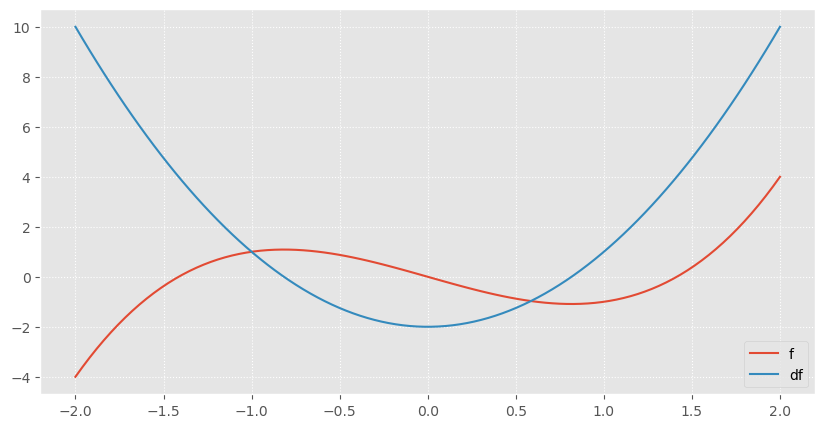

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(iksy, f(iksy), label='f')
plt.plot(iksy, df(iksy), label='df')
plt.grid(ls=':'); plt.legend();

Wiemy, że wartość bezwzględna $y=|x|$ nie jest różniczkowalna w punkcie $x_0=0$.

Klasa `Pochodna` ułatwia zrozumienie dlaczego tak jest.

In [19]:
iksy = np.linspace(-2, 2, 100)

f = lambda x: abs(x)
df = Pochodna(f)

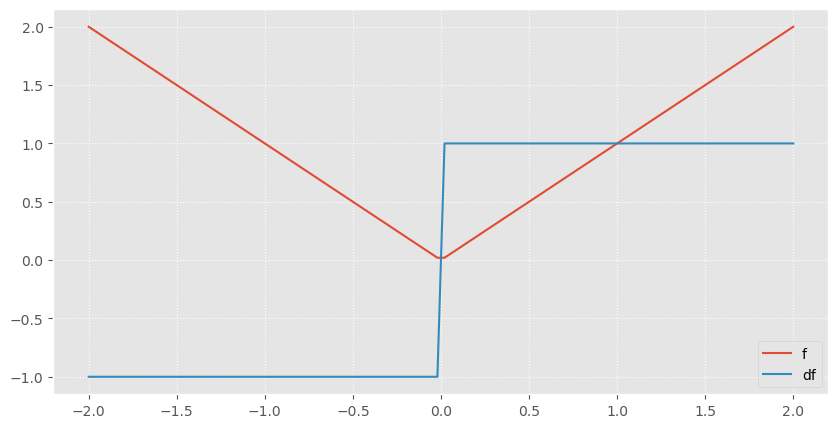

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(iksy, f(iksy), label='f')
plt.plot(iksy, df(iksy), label='df')
plt.grid(ls=':'); plt.legend();

Być może słyszałeś, że pochodna funkcji $y=f(x)$ w punkcie $x=x_0$ to współczynnik kierunkowy stycznej do wykresu $f$ w punkcie $(x_0, f(x_0))$. Teraz możemy potwierdzić to numerycznie. Wykorzystamy funkcję
$$y=x\sin 2x$$

In [21]:
iksy = np.linspace(0, 4, 100)

f = lambda x: x * np.sin(2 * x)
x0 = 2.7
y0 = f(x0)
a = Pochodna(f)(x0) # Współczynnik kierunkowy stycznej.

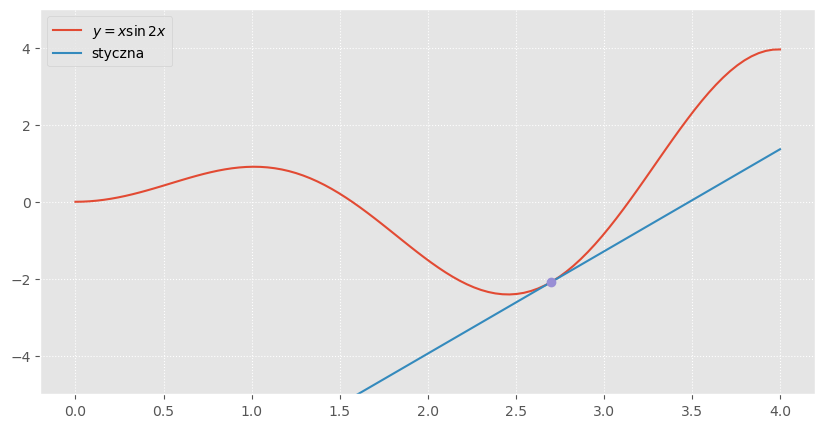

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(iksy, f(iksy), label=r'$y=x\sin 2x$')
plt.plot(iksy, a*(iksy - x0) + y0, label='styczna')
plt.plot(x0, y0, marker='o')
plt.ylim([-5, 5])
plt.grid(ls=':'); plt.legend();

## Wektory

Klasa `Wektor` reprezentuje wektory w przestrzeni euklidesowej:

In [23]:
class Wektor:
    
    def __init__(self, *wsp):
        self.wsp = wsp
    
    def __repr__(self):
        return 'Wektor({})'.format(', '.join(str(x) for x in self.wsp))
    
    def __add__(self, w):
        if len(self.wsp) != len(w.wsp):
            raise ValueError('Konflikt wymiarów.')
        
        wynik_wsp = tuple(x + y for x, y in zip(self.wsp, w.wsp))
        return Wektor(*wynik_wsp)
    
    def __rmul__(self, skalar):
        wynik_wsp = tuple(skalar * x for x in self.wsp)
        return Wektor(*wynik_wsp)
    
    def __neg__(self):
        return -1 * self
    
    def __sub__(self, w):
        return self + -w
    
    def __eq__(self, w):
        if len(self.wsp) != len(w.wsp):
            return False
        
        return all(x == y for x, y in zip(self.wsp, w.wsp))

In [24]:
w1 = Wektor(3, 1, 2)
w2 = Wektor(4, -2, 8)

w1, w2

(Wektor(3, 1, 2), Wektor(4, -2, 8))

In [25]:
w1 + w2

Wektor(7, -1, 10)

In [26]:
5 * w1

Wektor(15, 5, 10)

In [27]:
2*w1 - 3*w2

Wektor(-6, 8, -20)

In [28]:
.5 * w1

Wektor(1.5, 0.5, 1.0)

Metoda `__add__()` [*przeciąża*](https://pl.wikipedia.org/wiki/Przeci%C4%85%C5%BCanie_funkcji) operator `+`. 

Jeśli `x` i `y` są obiektami i `x` posiada metodę `__add__()`, to wyrażenie
```python
x + y
```
jest równoważne z
```python
x.__add__(y)
```

Oto zestaw metod działających analogicznie do `__add__()`:

* `__add__(self, y)` -- dodawanie `+`;
* `__sub__(self, y)` -- odejmowanie `-`;
* `__mul__(self, y)` -- mnożenie `*`;
* `__matmul__(self, y)` -- mnożenie macierzowe `@`;
* `__truediv__(self, y)` -- dzielenie zmiennoprzecinkowe `/`;
* `__floordiv__(self, y)` -- dzielenie podłogowe `//`;
* `__mod__(self, y)` -- reszta z dzielenia `%`;
* `__divmod__(self, y)` -- `divmod()`;
* `__pow__(self, y[, modulo])` -- potęga `**`;
* `__lshift__(self, y)` -- przesunięcie bitowe w lewo o `y` pozycji `<<`;
* `__rshift__(self, y)` -- przesunięcie bitowe w prawo o `y` pozycji `>>`;
* `__and__(self, y)` -- koniunkcja bitowa `&`;
* `__xor__(self, y)` -- bitowa alternatywa rozłączna `^`;
* `__or__(self, y)` -- alternatywa bitowa `|`.

Zauważ, że klasa `Wektor` nie ma metody `__mul__()`, posiada za to `__rmul__()`. Dlaczego?

Jeśli `x`, `y` są obiektami i `x` nie ma metody `__mul__()` lub `x.__mul__(y)` jest niewykonalne, to wyrażenie
```python
x * y
```
wywołuje
```python
y.__rmul__(x)
```

Operacja `x.__mul__(y)` jest uznawana za niewykonalną, gdy wartością zwracaną przez to wywołanie jest wartość specjalna `NotImplemented`. Zobacz szczegóły [tutaj](https://docs.python.org/3/library/constants.html#NotImplemented) i [tutaj](https://docs.python.org/3/library/numbers.html#implementing-the-arithmetic-operations).

W klasie `Wektor` metoda `__rmul__()` implementuje mnożenie liczby i wektora, a nie wektora przez wektor. Wyrażenie
```python
2 * w
```
próbuje najpierw wywołania `self.__mul__(w)`, gdzie `self` jest dwójką. To mnożenie się nie powiedzie, gdyż metoda `.__mul__()` w klasie liczb całkowitych nie potrafi mnożyć liczb przez obiekty klasy wektor. Wtedy interpreter poszukuje metody `__rmul__()` w obiekcie `w`. Gdy ją znajdzie, wywołuje
```python
w.__rmul__(2)
```
co daje pożądany efekt. Nie powiedzie się jednak
```python
w * 2
```
gdyż `w` nie posiada metody `__mul__()`! 

Moglibyśmy ją dopisać:
```python
class Wektor:
    
    <...> 
    
    def __rmul__(self, skalar):
        wynik_wsp = tuple(skalar * x for x in self.wsp)
        return Wektor(*wynik_wsp)
    
    def __mul__(self, skalar):
        return skalar * self
    
    <...>
```
Wyrażenie `skalar * self` odwoła się do metody `__rmul__()`, nie ma potrzeby pisania po raz drugi tego samego kodu. 

Jednak w algebrze liniowej mnożenie wektora przez skalar odbywa się w ten sposób, że skalar stoi z lewej strony wektora. Nie ma nic złego w tym, że operacja `2 * w` jest wykonalna a `w * 2` nie.

Oto metody działające podobnie do `__rmul__()`:
* `__radd__(self, x)`
* `__rsub__(self, x)`
* `__rmul__(self, x)`
* `__rmatmul__(self, x)`
* `__rtruediv__(self, x)`
* `__rfloordiv__(self, x)`
* `__rmod__(self, x)¶`
* `__rdivmod__(self, x)`
* `__rpow__(self, x)`
* `__rlshift__(self, x)`
* `__rrshift__(self, x)`
* `__rand__(self, x)`
* `__rxor__(self, x)`
* `__ror__(self, x)`

Metody `__eq__()`, `__ne__()` przeciążają operatory porównywania `==` i `!=`.
Jeśli nie zwracają bezpośrednio `True/False`, to na wartości zwracanej wywoływane jest `bool()`.
Metody `__ne__()` nie trzeba pisać - tworzona jest automatycznie, wywołuje `__eq__()` i zwraca zaprzeczenie.

Zestaw metod porównujących:

* `__lt__(self, y)` -- `<`
* `__le__(self, y)` -- `<=`
* `__eq__(self, y)` -- `==`
* `__ne__(self, y)` -- `!=`
* `__gt__(self, y)` -- `>`
* `__ge__(self, y)` -- `>=`

### Przykład: rząd macierzy

Wykorzystamy klasę `Wektor` do obliczenia rzędu macierzy:


```
 2  8   3 -4
 1  4   1 -2
 5  20  0 -10
-3 -12 -2  6
```

In [29]:
w1 = Wektor(2, 1, 5, -3)
w2 = Wektor(8, 4, 20, -12)
w3 = Wektor(3, 1, 0, -2)
w4 = Wektor(-4, -2, -10, 6)

print(w1, w2, w3, w4, sep='\n')

Wektor(2, 1, 5, -3)
Wektor(8, 4, 20, -12)
Wektor(3, 1, 0, -2)
Wektor(-4, -2, -10, 6)


Wykonujemy operacje na wierszach, tak aby macierz przybrała postać trójkątną. Dozwolone operacje (czyli takie, które nie zmieniają rzędu macierzy) to zmiana kolejności wierszy i dodawanie do wiersza innego wiersza przemnożonego przez skalar. Importujemy moduł fractions, aby pozostać w zbiorze liczb wymiernych (w przeciwnym razie wpadniemy w wartości zmiennoprzecinkowe).

In [30]:
from fractions import Fraction as F

w1, w2, w3, w4 = w1, w2 - 4*w1, w3 - F(3, 2) * w1, w4 + 2*w1

print(w1, w2, w3, w4, sep='\n')

Wektor(2, 1, 5, -3)
Wektor(0, 0, 0, 0)
Wektor(0, -1/2, -15/2, 5/2)
Wektor(0, 0, 0, 0)


In [31]:
# Zmieniamy kolejność ustawiając postać trójkątną.

w1, w2, w3, w4 = w1, w3, w2, w4

print(w1, w2, w3, w4, sep='\n')

Wektor(2, 1, 5, -3)
Wektor(0, -1/2, -15/2, 5/2)
Wektor(0, 0, 0, 0)
Wektor(0, 0, 0, 0)


In [32]:
# Mamy postać trójkątną. Rząd jest równy 2.

print(w1, w2, w3, w4, sep='\n')

Wektor(2, 1, 5, -3)
Wektor(0, -1/2, -15/2, 5/2)
Wektor(0, 0, 0, 0)
Wektor(0, 0, 0, 0)
